# Logistic Regression Project

by Ibrahim Pinzon Perez

## Introduction

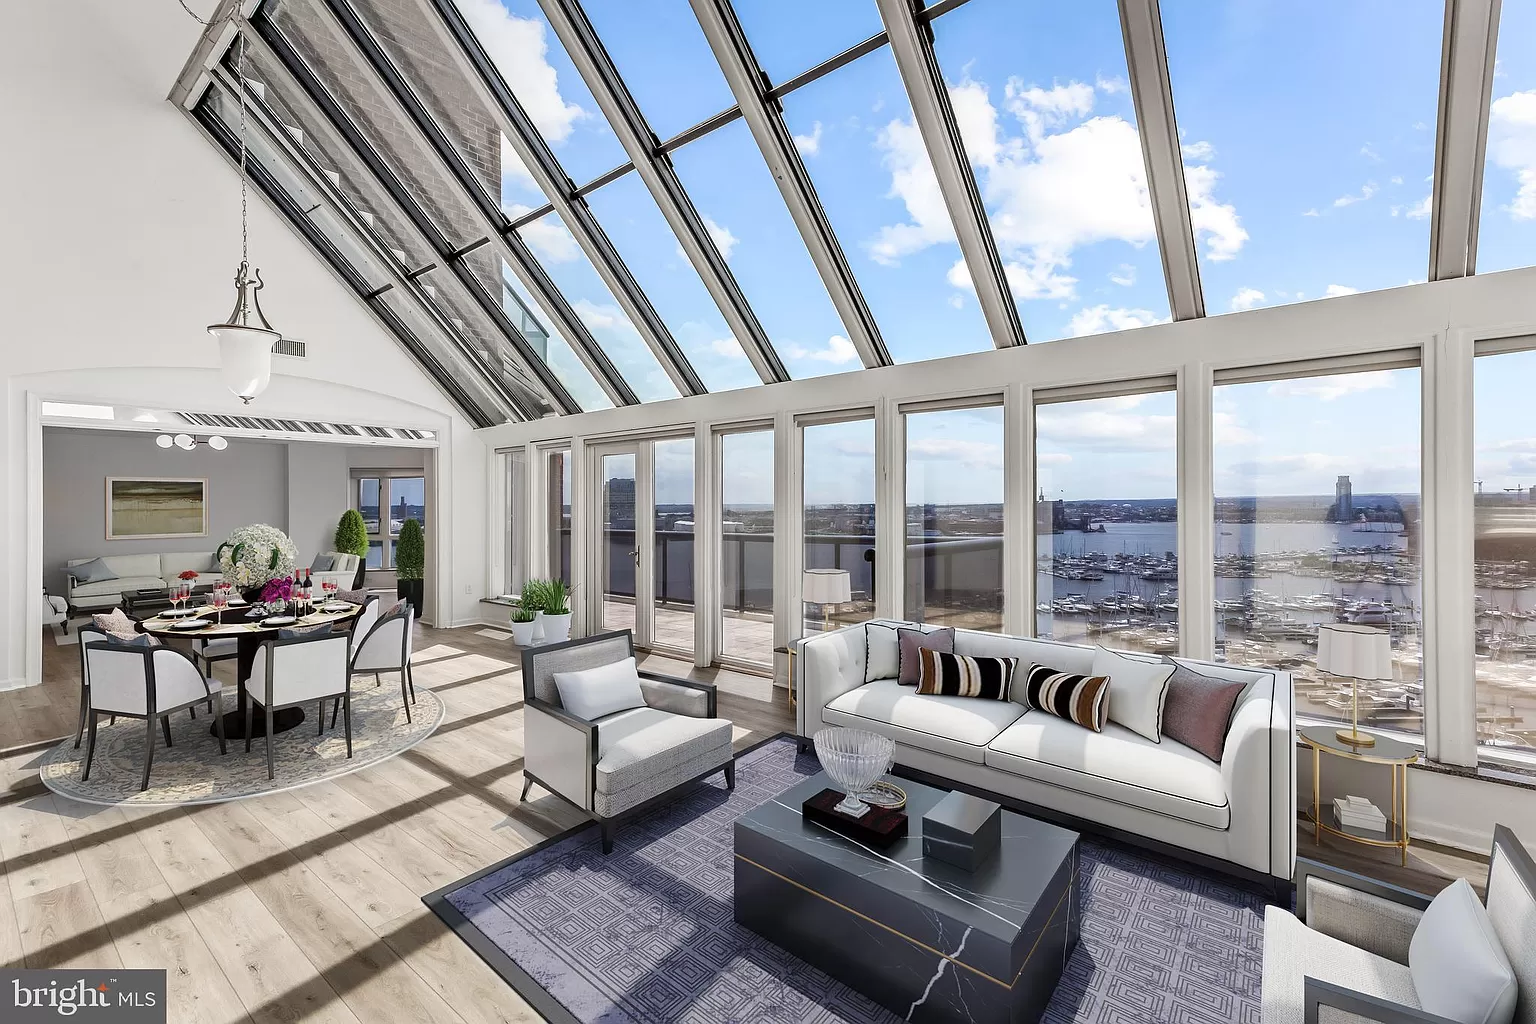

In [ ]:
from IPython.display import display, Image
display(Image("Bmore_condo.png"))

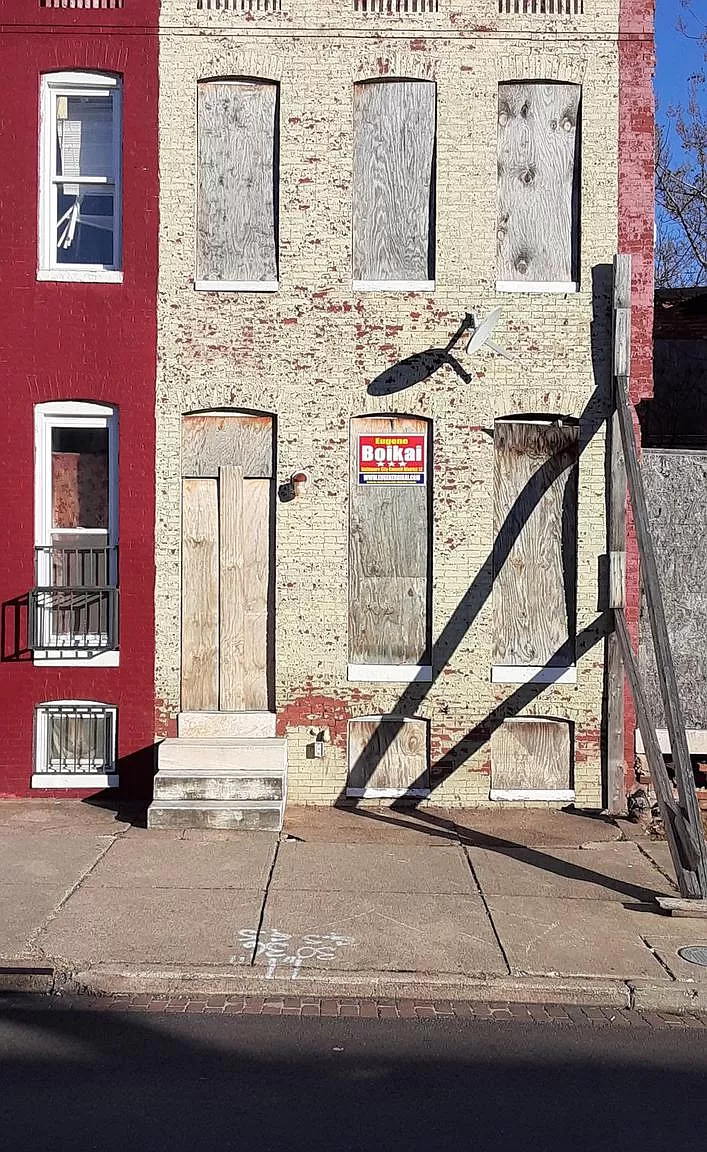

In [ ]:
display(Image(filename = "Bmore_Box.png"))

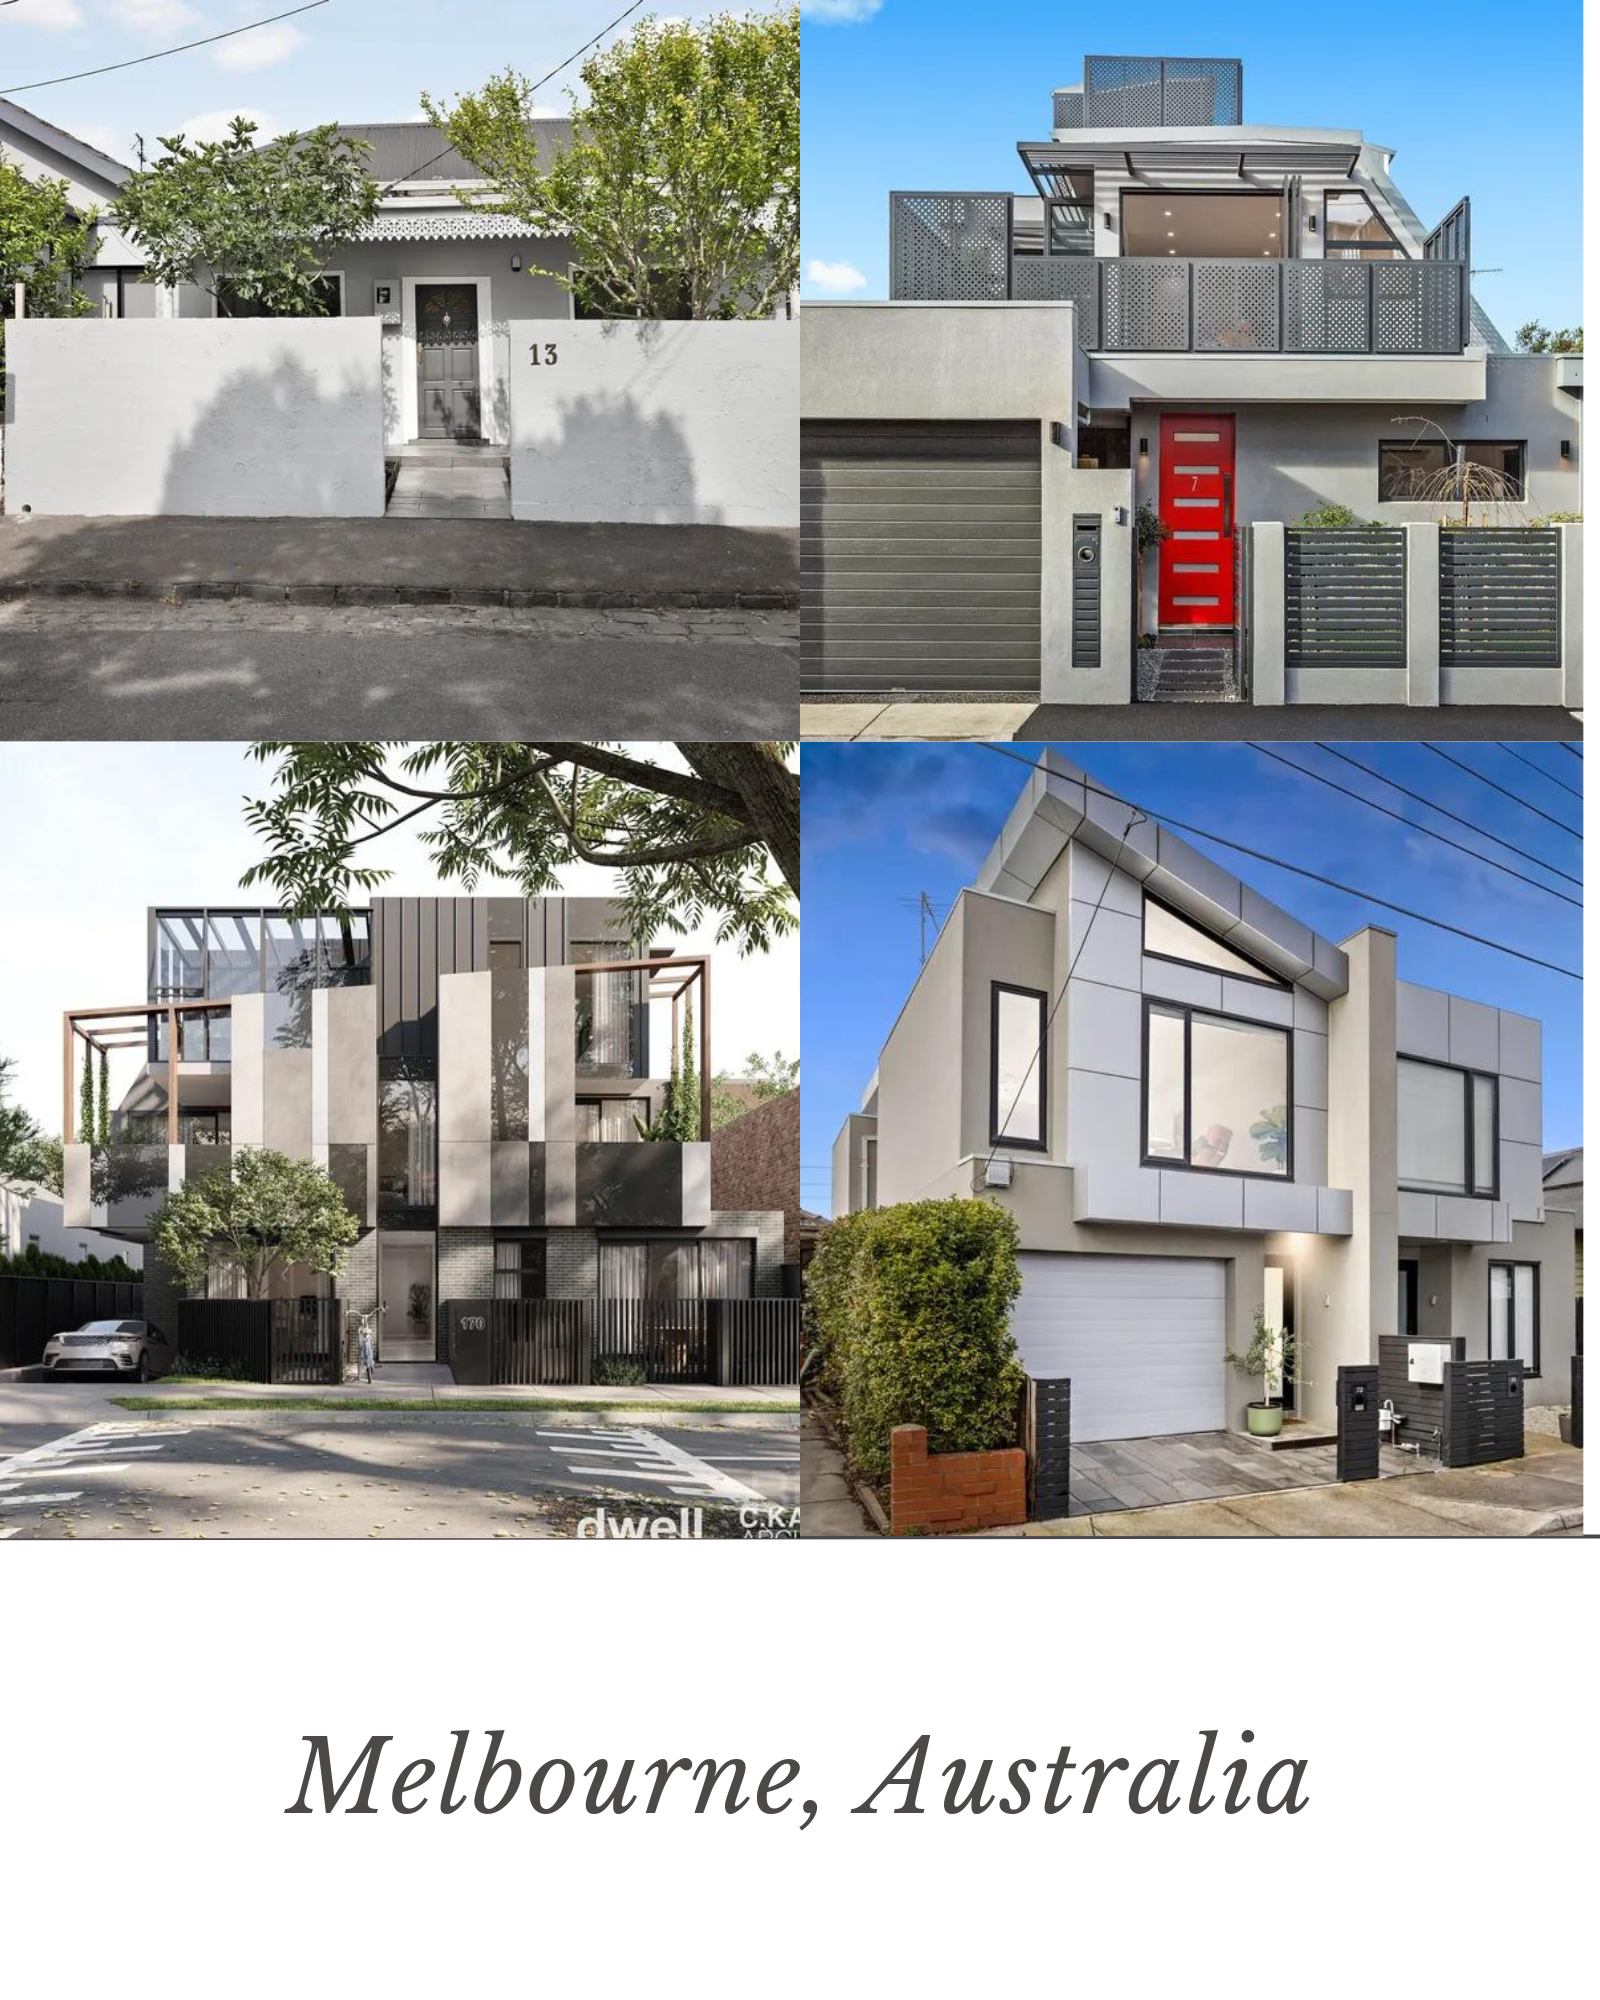

In [ ]:
display(Image("Melbourne.png"))

I obtained my dataset on Kaggle, and it contains listings of houses in Melbourne, Australia scraped from Domain.com.au. The variables of relevance are as follows:

Rooms: Number of rooms

Price: Price in dollars (AUD)

Type: br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

## Loading and Cleaning the Data

In [10]:
import pandas as pd
melb = pd.read_csv("melb_data.csv")
melb.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

### Removing irrelevant variables:

* Method of Sale

* Seller Username

* List Date

* Address

* Latitude & Lontitude

* Property Count

In [11]:
melb = melb.drop(columns = ["Address", "Type", "Method", "Date", "Propertycount", "Lattitude", "Longtitude", "SellerG"])
melb.fillna(melb.mean(), inplace = True)
melb['Price'] = melb['Price'] * 0.67 # AUD to USD
melb.head()

<ipython-input-11-3e866dca4cc9>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  melb.fillna(melb.mean(), inplace = True)


Suburb  Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
0  Abbotsford      2   991600.0       2.5    3067.0       2.0       1.0  1.0   
1  Abbotsford      2   693450.0       2.5    3067.0       2.0       1.0  0.0   
2  Abbotsford      3   981550.0       2.5    3067.0       3.0       2.0  0.0   
3  Abbotsford      3   569500.0       2.5    3067.0       3.0       2.0  1.0   
4  Abbotsford      4  1072000.0       2.5    3067.0       3.0       1.0  2.0   

   Landsize  BuildingArea    YearBuilt CouncilArea             Regionname  
0     202.0     151.96765  1964.684217       Yarra  Northern Metropolitan  
1     156.0      79.00000  1900.000000       Yarra  Northern Metropolitan  
2     134.0     150.00000  1900.000000       Yarra  Northern Metropolitan  
3      94.0     151.96765  1964.684217       Yarra  Northern Metropolitan  
4     120.0     142.00000  2014.000000       Yarra  Northern Metropolitan

## Surface Analysis: What factors truly influence the price of a house?

### Distance from Commercial Business District

Text(0, 0.5, 'Price of House (US dollars)')

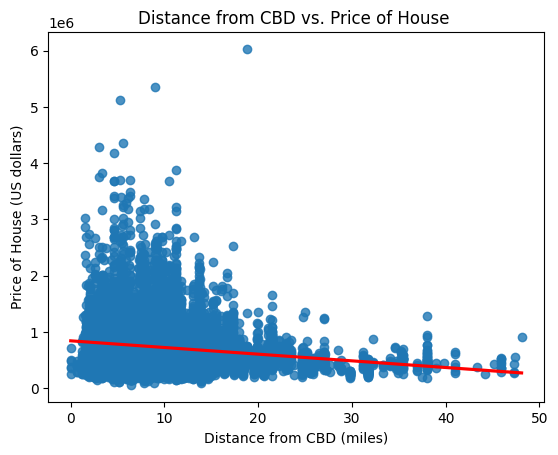

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = "Distance", y = "Price", data = melb, line_kws={'color': 'red'})

plt.title("Distance from CBD vs. Price of House ")
plt.xlabel("Distance from CBD (miles)")
plt.ylabel("Price of House (US dollars)")

### Rooms

(0.0, 10.0)

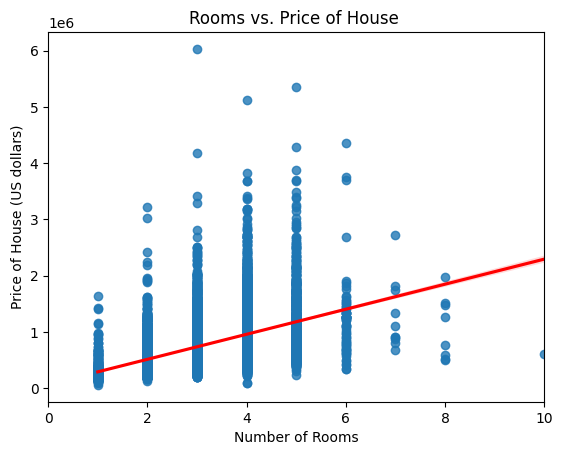

In [18]:
sns.regplot(x = "Rooms", y = "Price", data = melb, line_kws={'color': 'red'})

plt.title("Rooms vs. Price of House ")
plt.xlabel("Number of Rooms")
plt.ylabel("Price of House (US dollars)")
plt.xlim(0, 10)

### Year Built

(1950.0, 2023.0)

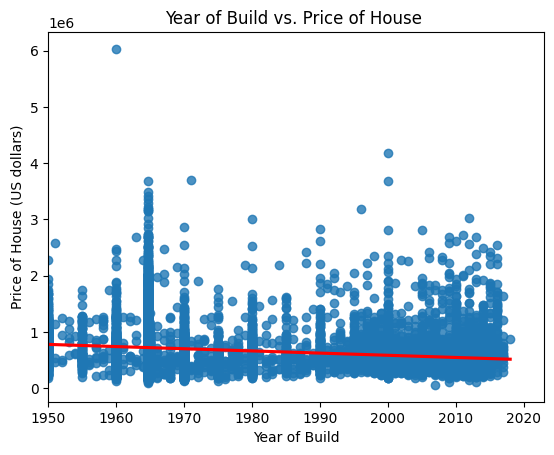

In [21]:
sns.regplot(x = "YearBuilt", y = "Price", data = melb, line_kws={'color': 'red'})

plt.title("Year of Build vs. Price of House ")
plt.xlabel("Year of Build")
plt.ylabel("Price of House (US dollars)")
plt.xlim(1950, 2023)

## Logistic Regression Model

### Creating a new column with binary outcome of whether or not a house is a million dollar house

In [23]:
import numpy as np
melb['MillionDHouse'] = np.where(melb['Price'] > 1000000, 1, 0) # Recoding if else a house is worth more than $1,000,000
melb.head()

Suburb  Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
0  Abbotsford      2   991600.0       2.5    3067.0       2.0       1.0  1.0   
1  Abbotsford      2   693450.0       2.5    3067.0       2.0       1.0  0.0   
2  Abbotsford      3   981550.0       2.5    3067.0       3.0       2.0  0.0   
3  Abbotsford      3   569500.0       2.5    3067.0       3.0       2.0  1.0   
4  Abbotsford      4  1072000.0       2.5    3067.0       3.0       1.0  2.0   

   Landsize  BuildingArea    YearBuilt CouncilArea             Regionname  \
0     202.0     151.96765  1964.684217       Yarra  Northern Metropolitan   
1     156.0      79.00000  1900.000000       Yarra  Northern Metropolitan   
2     134.0     150.00000  1900.000000       Yarra  Northern Metropolitan   
3      94.0     151.96765  1964.684217       Yarra  Northern Metropolitan   
4     120.0     142.00000  2014.000000       Yarra  Northern Metropolitan   

   MillionDHouse  
0              0  
1              0  
2              0  
3              0  
4              1

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Adding extra 'accuracy_score' not in Logistic Regression Notebook

X = melb[['Distance', 'YearBuilt', 'Rooms', "BuildingArea"]]
y = melb['MillionDHouse']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25 , random_state= 999)

LogReg = LogisticRegression()

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

print(classification_report(y_test, y_pred)) # Moderately high accuracy score of 0.84
# High precision on non-million dollar home, could be due to chance or unaligned data (units)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2763
           1       0.65      0.35      0.46       632

    accuracy                           0.84      3395
   macro avg       0.76      0.65      0.68      3395
weighted avg       0.83      0.84      0.82      3395



## ROC graph

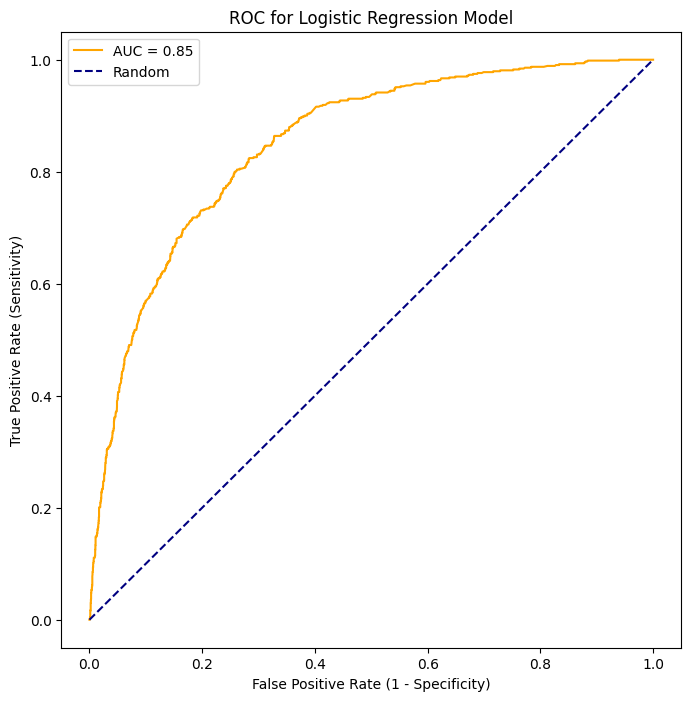

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = LogReg.predict_proba(X_test)[:, 1] # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC for Logistic Regression Model')
plt.legend()
plt.show() # AUC close to 1, suggests a model without random performance

## Conclusion

Our model was shown to have moderately high accuracy, with an F1 score of 0.84. An F1 score compiles precision (True Positives) and recall (False Negatives) into 1 metric. This indicate that our model has achieved a balance between these two, meaning it maximized true positives and minimized false negatives by its respective score. One thing to take away as well is that there could be some flaws in how the data interacts due to the fact that we assumed units for each column as it was not stated by the owner of the data.

Statement piece of One-Versus-All & One-Versus-One

One-versus-all: Seperate classifiers in a logistic regression model into positives and negatives and select the one with highest probability

* More simple for larger number of classes
* Leads to an imbalance of datasets for certain classes

One-versus-one: Train classifiers in a logistic regression model for each pair of classes in a "votes" style.

* More balance within classifiers training
* Is impractical for larger amounts of classes


